<a href="https://colab.research.google.com/github/AmeeraWan/Analytics/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash

     |████████████████████████████████| 28.8 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 9.6 MB 5.4 MB/s 
     |████████████████████████████████| 357 kB 21.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=3c36a02f155c2a9642651af2562db110df16886cf683dcda77878bf8a2714c50
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  """


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Applications/data analyst Amili/webforum.csv')

In [ ]:
data

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.50,0.00,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.00,1.85,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.60,3.68,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.50,3.45,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.50,2.78,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,228882,55270,2005-09-04,09:58,31,35.22,25.93,78.86,25.77,10.33,6.45,0.00,3.23,0.00,0.00,0.00,0.00,0.00,0.00
29996,308427,101907,2006-07-09,03:57,230,10.24,51.74,75.90,19.29,230.00,10.00,0.43,2.17,2.17,1.74,3.91,1.74,2.17,0.00
29997,270005,84194,2006-02-12,01:41,86,70.92,85.24,8.57,86.31,8.60,0.00,4.65,0.00,6.98,1.16,5.81,4.65,1.16,0.00
29998,659289,181593,2009-11-22,06:41,55,36.16,13.76,31.94,5.95,27.50,1.82,0.00,0.00,1.82,0.00,1.82,0.00,1.82,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ThreadID   30000 non-null  int64  
 1   AuthorID   30000 non-null  int64  
 2   Date       30000 non-null  object 
 3   Time       30000 non-null  object 
 4   WC         30000 non-null  int64  
 5   Analytic   30000 non-null  float64
 6   Clout      30000 non-null  float64
 7   Authentic  30000 non-null  float64
 8   Tone       30000 non-null  float64
 9   WPS        30000 non-null  float64
 10  i          30000 non-null  float64
 11  we         30000 non-null  float64
 12  you        30000 non-null  float64
 13  they       30000 non-null  float64
 14  number     30000 non-null  float64
 15  affect     30000 non-null  float64
 16  posemo     30000 non-null  float64
 17  negemo     30000 non-null  float64
 18  anx        30000 non-null  float64
dtypes: float64(14), int64(3), object(2)
memory usa

In [ ]:
data['Date'] = pd.to_datetime(data["Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ThreadID   30000 non-null  int64         
 1   AuthorID   30000 non-null  int64         
 2   Date       30000 non-null  datetime64[ns]
 3   Time       30000 non-null  object        
 4   WC         30000 non-null  int64         
 5   Analytic   30000 non-null  float64       
 6   Clout      30000 non-null  float64       
 7   Authentic  30000 non-null  float64       
 8   Tone       30000 non-null  float64       
 9   WPS        30000 non-null  float64       
 10  i          30000 non-null  float64       
 11  we         30000 non-null  float64       
 12  you        30000 non-null  float64       
 13  they       30000 non-null  float64       
 14  number     30000 non-null  float64       
 15  affect     30000 non-null  float64       
 16  posemo     30000 non-null  float64      

Checking for duplicates

In [ ]:
data[data.duplicated()]

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx
21456,279233,83488,2006-03-19,20:06,7,28.22,7.67,89.63,99.00,3.5,14.29,0.0,0.0,0.00,0.00,14.29,14.29,0.0,0.0
28589,285284,42460,2006-04-14,10:00,47,16.67,26.16,1.00,66.07,47.0,2.13,0.0,0.0,4.26,2.13,2.13,2.13,0.0,0.0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data[data.duplicated()]

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx


**Question 1**

a. Analyse activity and language on the forum over time. Some starting points:

• Describe your data: How active are participants, and are there periods where this increases
or decreases? Is there a trend over time?



In [ ]:
data.Date.dt.year.sort_values()

22788    2002
9236     2002
2546     2002
22884    2002
24212    2002
         ... 
7187     2011
16985    2011
7182     2011
16961    2011
23945    2011
Name: Date, Length: 29998, dtype: int64

In [ ]:
data.AuthorID.unique().min()

-1

In [ ]:
freq = data.groupby(data.Date.dt.year).agg({"ThreadID": 'count'}).reset_index()

In [ ]:
freq

,Date,ThreadID
0,2002,1218
1,2003,985
2,2004,1764
3,2005,4485
4,2006,6917
5,2007,4864
6,2008,3209
7,2009,2584
8,2010,1821
9,2011,2151


In [ ]:
line = px.line(freq, x='Date', y= 'ThreadID', title='Active Participant Overtime', labels = dict(ThreadID = 'Level of Activity'))
line.show()

Participant was more active from the year 2003 up to 2006 and then there was a decline from this year on wards.

In [ ]:
full = data.groupby('Date').agg({"ThreadID": 'count'}).reset_index()
full

,Date,ThreadID
0,2002-01-01,1
1,2002-01-02,3
2,2002-01-04,5
3,2002-01-05,1
4,2002-01-06,5
...,...,...
3356,2011-12-27,3
3357,2011-12-28,3
3358,2011-12-29,11
3359,2011-12-30,4


In [ ]:
full_line = px.line(full, x='Date', y= 'ThreadID', title='Active Participant Overtime', labels = dict(ThreadID = 'Level of Activity'))
full_line.show()

The highest peak is at 12 december 2005. When we look at daily trends it seems fairly constant but with a peak at december 2005 where it starts at december 10 to 12. but can defnitely see it rising and then go back to constant as before.

• Looking at the linguistic variables, do these change over time? Is there a relationship
between variables?

Based on the paper, linguistic variables are as follows:

• Analytic

• Clout

• Authentic

• Tone

In [ ]:
data

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.50,0.00,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.00,1.85,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.60,3.68,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.50,3.45,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.50,2.78,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,228882,55270,2005-09-04,09:58,31,35.22,25.93,78.86,25.77,10.33,6.45,0.00,3.23,0.00,0.00,0.00,0.00,0.00,0.00
29996,308427,101907,2006-07-09,03:57,230,10.24,51.74,75.90,19.29,230.00,10.00,0.43,2.17,2.17,1.74,3.91,1.74,2.17,0.00
29997,270005,84194,2006-02-12,01:41,86,70.92,85.24,8.57,86.31,8.60,0.00,4.65,0.00,6.98,1.16,5.81,4.65,1.16,0.00
29998,659289,181593,2009-11-22,06:41,55,36.16,13.76,31.94,5.95,27.50,1.82,0.00,0.00,1.82,0.00,1.82,0.00,1.82,0.00


In [ ]:
lv_year = data.groupby(data.Date.dt.year).agg({'Analytic':'sum', 'Clout': 'sum', 'Authentic':'sum', 'Tone': 'sum'}).reset_index()
lv_year

,Date,Analytic,Clout,Authentic,Tone
0,2002,72899.39,75636.11,44899.58,52915.65
1,2003,61589.45,58293.58,36518.16,43652.95
2,2004,107334.44,104869.75,66665.45,78851.71
3,2005,270093.68,270377.67,162893.58,196944.28
4,2006,421223.28,393809.72,250044.36,311343.57
5,2007,289894.40,281157.77,178784.80,219099.49
6,2008,189940.83,187050.06,121181.26,143196.93
7,2009,154390.24,150640.99,102500.84,114701.95
8,2010,112544.58,111364.27,70378.38,82972.93
9,2011,132343.03,131163.19,80894.33,93392.77


In [ ]:
px.line(lv_year, x='Date', y= ['Tone','Analytic','Clout', 'Authentic'], title='Language Variables used Overtime', labels=dict(value='Usage of Language Variables', variable = 'Language Variables'))


For most of the time, the four language variables had a similar trend in usage over the years where it increased up to 2006 and decreased after 2006.
It also appears that analytic and clout are commonly used together and they are the most dominant variables throughout the years. Authentic and emotional tones seem to be used together as they appear close together. However, further investigation is needed to confirm this.


In [ ]:
lv_full = data.groupby('Date').agg({'Analytic':'sum', 'Clout': 'sum', 'Authentic':'sum', 'Tone': 'sum'}).reset_index()
lv_full

,Date,Analytic,Clout,Authentic,Tone
0,2002-01-01,17.96,28.28,86.38,25.77
1,2002-01-02,191.24,137.86,61.66,163.79
2,2002-01-04,386.97,390.97,108.61,144.16
3,2002-01-05,47.35,79.76,9.40,25.77
4,2002-01-06,266.28,336.14,162.80,90.97
...,...,...,...,...,...
3356,2011-12-27,161.58,148.74,73.84,218.94
3357,2011-12-28,165.65,148.84,99.78,127.39
3358,2011-12-29,892.58,534.13,406.32,410.37
3359,2011-12-30,205.81,274.54,222.87,131.55


In [ ]:
px.line(lv_full, x='Date', y= ['Tone','Analytic','Clout', 'Authentic'], title='Language Variables used Overtime', labels=dict(value='Usage of Language Variables', variable = 'Language Variables'))


Also, when we look at the usage of languages around december 2005. We can see that the dominant languages used by people during this time are mainly Clout and Analytical variables. Which is around the same time as the Cronulla riots which are demonstrations against ethinic violence. Which makes sense that you would expect a lot of analytical, powerful and impactful discussions during these times. The level of tone and authenticity also increased during this time which demonstrates that people were being empathetic to the ongoing riots and were genuine in their thoughts for the rough times.

In [ ]:
lv = data[['Analytic', 'Clout', 'Authentic', 'Tone']]
lv

,Analytic,Clout,Authentic,Tone
0,82.26,71.43,25.14,25.77
1,25.71,94.73,45.81,33.77
2,31.61,67.04,28.81,79.41
3,39.74,91.60,3.81,85.87
4,80.75,60.95,23.51,88.52
...,...,...,...,...
29995,35.22,25.93,78.86,25.77
29996,10.24,51.74,75.90,19.29
29997,70.92,85.24,8.57,86.31
29998,36.16,13.76,31.94,5.95


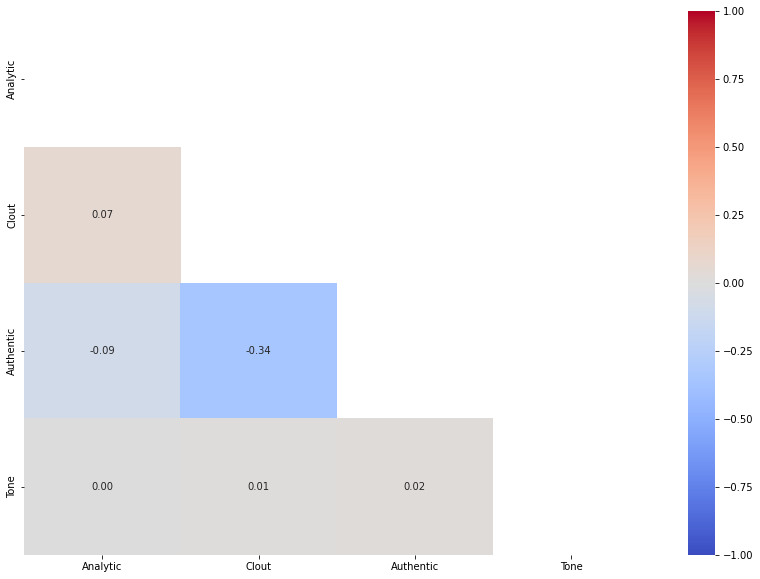

In [ ]:
# By default it uses pearson correlation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
import matplotlib.pyplot as plt
matrix = np.triu(lv.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (lv.corr(method='spearman'), annot=True, fmt= '.2f', vmin=-1, vmax=1, mask=matrix, center=0,  cmap='coolwarm', ax=ax);

The results produced here is pearson correlation, I have tested out with kendall and spearman as well and they all produced similar results.
Based on the heatmap, There is a positive correlation between clout and analytical variable as observed in the line plot above. However, there is no correlation between tone and authentic variable as thought. Interestingly there is a negative correlation between authenticity and clout variables. Would this mean that someone who often uses clout languages is less authentic with their words? There is also a slight negative correlation between authenticity and analytic variables which make sense since there is a positive correlation between clout and analytic variable.


In [ ]:
#px.imshow(lv.corr(), text_auto=True)

**Question 2**

b. Analyse the language used by groups. Some starting points:

• Threads indicate groups of participants communicating on the same topic. Describe the
threads present in your data.

• By analysing the linguistic variables for all or some of the threads, is it possible to see a
difference in the language used by different groups?

• Does the language used within threads (or between threads) change over time? How
consistent or variable is the language used within threads?

In [ ]:
len(data.ThreadID.unique())

4434

In [ ]:
thread = data.groupby('ThreadID').agg({'AuthorID': 'count'}).reset_index()
thread

,ThreadID,AuthorID
0,4466,1
1,6277,2
2,7791,2
3,8354,1
4,8616,2
...,...,...
4429,855364,3
4430,855975,1
4431,856035,7
4432,856304,4


In [ ]:
fig = px.box(thread, y="AuthorID", labels=dict(AuthorID='Number of Participants'), title=' Distribution of participants in a Thread')
fig.show()


A single thread typically consist between 1 to 17 people. It rarely goes beyond 17 but it does happens. On average a single thread should consist of 4 people.

The most popular thread is 252620 which has 222 people talking about it

In [ ]:
thread.query('AuthorID == 222')

,ThreadID,AuthorID
1345,252620,222


In [ ]:
tid = data.query('ThreadID == 252620')
tid

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx
263,252620,65393,2005-12-11,08:39,50,40.12,65.56,20.24,63.69,7.14,8.00,0.00,2.00,2.00,0.00,10.00,6.00,4.00,0.00
284,252620,77054,2005-12-11,07:16,10,77.33,2.31,43.37,99.00,10.00,0.00,0.00,0.00,0.00,0.00,10.00,10.00,0.00,0.00
406,252620,80208,2005-12-11,06:29,57,58.35,50.00,28.23,6.35,19.00,5.26,1.75,0.00,0.00,3.51,5.26,1.75,3.51,1.75
438,252620,34292,2005-12-11,11:45,81,82.52,80.62,84.78,2.98,11.57,1.23,1.23,2.47,1.23,4.94,2.47,0.00,2.47,0.00
460,252620,84216,2006-01-04,10:46,153,80.43,65.27,53.79,25.77,10.20,2.61,3.27,0.00,0.65,3.92,2.61,1.31,1.31,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29158,252620,65619,2005-12-11,07:48,349,97.90,66.64,41.89,3.65,21.81,0.00,0.00,0.00,1.72,3.44,4.58,1.15,3.44,0.00
29281,252620,75902,2005-12-13,02:34,80,44.33,94.78,59.88,49.00,16.00,1.25,2.50,3.75,2.50,0.00,11.25,6.25,5.00,0.00
29400,252620,48585,2005-12-08,05:40,115,95.05,60.30,83.97,6.45,38.33,1.74,0.00,0.00,3.48,0.00,3.48,0.87,2.61,0.00
29588,252620,68133,2005-12-13,05:49,31,35.22,25.93,78.86,83.22,10.33,3.23,0.00,3.23,0.00,3.23,3.23,3.23,0.00,0.00


In [ ]:
tid_group = tid.groupby('Date').agg({'AuthorID':'count'}).reset_index()
tid_group

,Date,AuthorID
0,2005-12-07,5
1,2005-12-08,17
2,2005-12-09,5
3,2005-12-10,6
4,2005-12-11,80
5,2005-12-12,43
6,2005-12-13,34
7,2005-12-14,9
8,2005-12-15,5
9,2005-12-16,3


When looking into this ID it turns out the discussion was happening from 2005-12-07 to 2006-12-20 which lasted for about a year. we can see that it especially peaked around december 11 to 13 which is around the time the cronulla riot was happening and was a hot topic. That may have brought so many people together that it built a community which explains why it lasted for almost a year since the riot happened. Could have been a support group during the hard time.

In [ ]:
px.line(tid_group, x='Date', y= 'AuthorID', title='Number of Discussions Overtime', labels=dict(AuthorID = 'Number of Participant'))


Below is the distribution of participants in a thread, we can see that majority of the threads would consist of a single person. The distribution is right skewed which is reflective of the box plot above.

In [ ]:
fig = px.histogram(thread, x="AuthorID", labels=dict(AuthorID = 'Number of Participant'), title='Distribution of Participants in Threads')
fig.show()

• By analysing the linguistic variables for all or some of the threads, is it possible to see a difference in the language used by different groups?

In [ ]:
lvt = data[['ThreadID','AuthorID', 'Analytic', 'Clout', 'Authentic', 'Tone']]
lvt

,ThreadID,AuthorID,Analytic,Clout,Authentic,Tone
0,659289,193537,82.26,71.43,25.14,25.77
1,432269,136196,25.71,94.73,45.81,33.77
2,572531,170305,31.61,67.04,28.81,79.41
3,230003,32359,39.74,91.60,3.81,85.87
4,459059,47875,80.75,60.95,23.51,88.52
...,...,...,...,...,...,...
29995,228882,55270,35.22,25.93,78.86,25.77
29996,308427,101907,10.24,51.74,75.90,19.29
29997,270005,84194,70.92,85.24,8.57,86.31
29998,659289,181593,36.16,13.76,31.94,5.95


In [ ]:
full_lvt = lvt.groupby('ThreadID').agg({'Analytic':'mean', 'Clout': 'mean', 'Authentic':'mean', 'Tone': 'mean'}).reset_index()
full_lvt

,ThreadID,Analytic,Clout,Authentic,Tone
0,4466,13.850000,23.750000,1.060000,25.770000
1,6277,12.845000,38.780000,18.465000,1.000000
2,7791,68.875000,57.320000,20.015000,31.355000
3,8354,99.000000,93.300000,3.370000,96.760000
4,8616,61.590000,64.580000,47.150000,23.880000
...,...,...,...,...,...
4429,855364,80.233333,53.483333,52.263333,54.256667
4430,855975,94.740000,48.400000,38.190000,63.690000
4431,856035,63.612857,62.691429,49.265714,34.558571
4432,856304,52.957500,73.087500,45.487500,68.307500


In [ ]:
x = full_lvt.iloc[:,1:5]
x

,Analytic,Clout,Authentic,Tone
0,13.850000,23.750000,1.060000,25.770000
1,12.845000,38.780000,18.465000,1.000000
2,68.875000,57.320000,20.015000,31.355000
3,99.000000,93.300000,3.370000,96.760000
4,61.590000,64.580000,47.150000,23.880000
...,...,...,...,...
4429,80.233333,53.483333,52.263333,54.256667
4430,94.740000,48.400000,38.190000,63.690000
4431,63.612857,62.691429,49.265714,34.558571
4432,52.957500,73.087500,45.487500,68.307500


To answer the above question, I had to look at the number of possible clusters in the dataset as it is possible that different threads are likely to use different language variables at different levels. Here I plotted kmeans clustering ranging from 1 to 40. It starts to plateau near 40 which indicates that there could be almost 40 different clusters. This means that there could be groups of 40 that uses the 4 language variables at different levels.


Text(0, 0.5, 'WCSS')

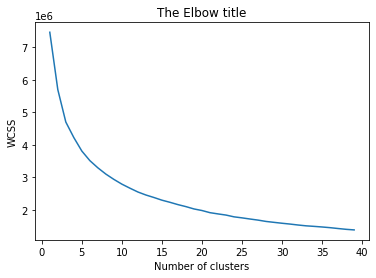

In [ ]:
# Kmeans clustering

# Choosing the best number of parameters
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,40):

  kmeans = KMeans(i)

  kmeans.fit(x)

  wcss_iter = kmeans.inertia_

  wcss.append(wcss_iter)


number_clusters = range(1,40)

plt.plot(number_clusters,wcss)

plt.title('The Elbow title')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(38)
kmeans.fit(x)
identified_clsuters = kmeans.fit_predict(x)
identified_clsuters

array([23, 23, 36, ..., 15,  5,  5], dtype=int32)

In [ ]:
#Importing required modules

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np



In [ ]:
# Perform data dimensional reduction so that it can fit in a 2d scatter plot
# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

pca =PCA(2)
xt = pca.fit_transform(x)
xt

array([[-16.27151698,  15.40995932],
       [-35.56491814,  31.76567008],
       [-18.54501995,  -6.47195039],
       ...,
       [ -5.89672281,  12.49827779],
       [ 22.89790674,  -5.46981508],
       [ 30.02329803, -10.58438623]])

In [ ]:
#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 38)

#predict the labels of clusters.
label = kmeans.fit_predict(xt)

print(label)

[32 15 23 ... 26  6  6]


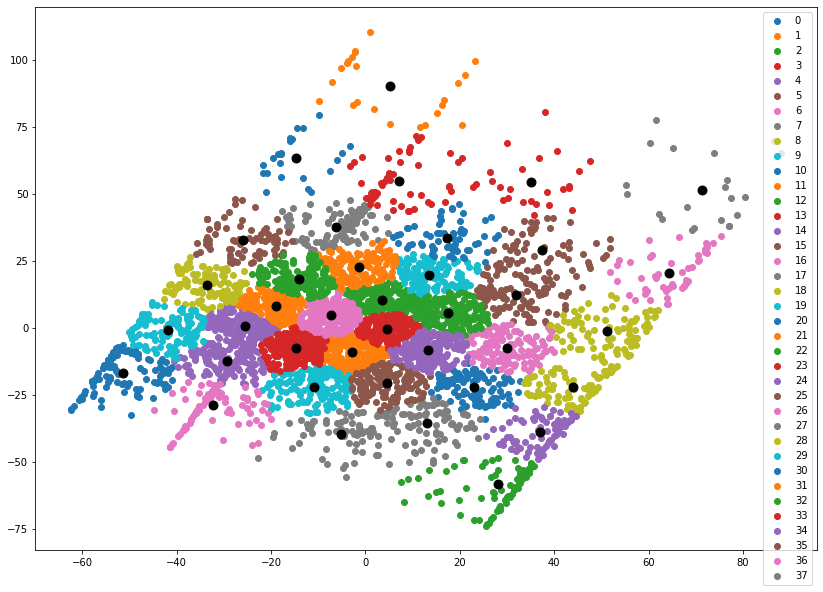

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

fig, ax = plt.subplots(figsize=(14,10))

for i in u_labels:
    plt.scatter(xt[label == i , 0] , xt[label == i , 1] , label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

We can see that there are clear divisions between the groups which strengthens the idea that it is possible to see a difference in the language used by different groups

It shows that there are multiple different groups using different languages at different levels

• Does the language used within threads (or between threads) change over time? How consistent or variable is the language used within threads?

In [ ]:
data

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.50,0.00,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.00,1.85,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.60,3.68,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.50,3.45,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.50,2.78,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,228882,55270,2005-09-04,09:58,31,35.22,25.93,78.86,25.77,10.33,6.45,0.00,3.23,0.00,0.00,0.00,0.00,0.00,0.00
29996,308427,101907,2006-07-09,03:57,230,10.24,51.74,75.90,19.29,230.00,10.00,0.43,2.17,2.17,1.74,3.91,1.74,2.17,0.00
29997,270005,84194,2006-02-12,01:41,86,70.92,85.24,8.57,86.31,8.60,0.00,4.65,0.00,6.98,1.16,5.81,4.65,1.16,0.00
29998,659289,181593,2009-11-22,06:41,55,36.16,13.76,31.94,5.95,27.50,1.82,0.00,0.00,1.82,0.00,1.82,0.00,1.82,0.00


In [ ]:
data['Mean'] = (data.Analytic + data.Clout + data.Authentic + data.Tone)/4
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx,Mean
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.5,0.00,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00,51.1500
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.0,1.85,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00,50.0050
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.6,3.68,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74,51.7175
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.5,3.45,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00,55.2550
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.5,2.78,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00,63.4325


In [ ]:
mean = data[['ThreadID','Date', 'Mean']]
mean

,ThreadID,Date,Mean
0,659289,2009-11-24,51.1500
1,432269,2007-11-26,50.0050
2,572531,2009-02-17,51.7175
3,230003,2005-09-07,55.2550
4,459059,2008-02-19,63.4325
...,...,...,...
29995,228882,2005-09-04,41.4450
29996,308427,2006-07-09,39.2925
29997,270005,2006-02-12,62.7600
29998,659289,2009-11-22,21.9525


In [ ]:
a = mean.groupby([data.Date.dt.year, 'ThreadID']).agg({'Mean':'mean'}).reset_index()
a

,Date,ThreadID,Mean
0,2002,6277,17.772500
1,2002,7791,44.391250
2,2002,8354,73.107500
3,2002,8616,49.300000
4,2002,8740,51.149167
...,...,...,...
4766,2011,855364,60.059167
4767,2011,855975,61.255000
4768,2011,856035,52.532143
4769,2011,856304,59.960000


In [ ]:
ThreadID5 = a.groupby('ThreadID').agg({'Date':'count'}).reset_index().query('Date ==5')['ThreadID']
ThreadID5

527      92985
675     120790
793     140099
815     145223
1301    246014
Name: ThreadID, dtype: int64

In [ ]:
t5 = a[a['ThreadID'].isin(ThreadID5)]
t5 = t5.query('ThreadID != 246014')
t5

,Date,ThreadID,Mean
331,2002,145223,41.620625
531,2003,92985,48.757500
691,2004,120790,50.820417
830,2004,145223,48.000568
935,2005,92985,36.194286
939,2005,120790,52.323125
944,2005,140099,51.618542
946,2005,145223,43.876518
1513,2006,145223,43.244082
2490,2007,92985,52.861471


In [ ]:
px.line(t5, x='Date', y= 'Mean', color= 'ThreadID', title='Language Variables used within threads Overtime')


Here we can see that languages used between threads are different and within a single thread it does changes over time.

**Question 3**

c. Challenge: Social networks online. We can think of participants posting to the same thread
at similar times (for example during the same month) as forming a social network. When
these participants also post to other threads over the same period, their social network
extends.

• Can you define, graph and describe the social network that exists at a particular point in
time, for example over one month? How does this change in the following months?

• Note: you only need to analyse a small portion of the social network over a short time
period.

In [ ]:
data.head()

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,i,we,you,they,number,affect,posemo,negemo,anx,Mean
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.5,0.00,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00,51.1500
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.0,1.85,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00,50.0050
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.6,3.68,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74,51.7175
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.5,3.45,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00,55.2550
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.5,2.78,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00,63.4325


In [ ]:
cp_data = data

In [ ]:
pd.to_datetime(cp_data.Date.dt.strftime('%Y-%m'))

0       2009-11-01
1       2007-11-01
2       2009-02-01
3       2005-09-01
4       2008-02-01
           ...    
29995   2005-09-01
29996   2006-07-01
29997   2006-02-01
29998   2009-11-01
29999   2010-04-01
Name: Date, Length: 29998, dtype: datetime64[ns]

In [ ]:
cp_data['DT'] = pd.to_datetime(cp_data.Date.dt.strftime('%Y-%m'))
cp_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,we,you,they,number,affect,posemo,negemo,anx,Mean,DT
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.50,...,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00,51.1500,2009-11-01
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.00,...,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00,50.0050,2007-11-01
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.60,...,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74,51.7175,2009-02-01
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.50,...,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00,55.2550,2005-09-01
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.50,...,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00,63.4325,2008-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,228882,55270,2005-09-04,09:58,31,35.22,25.93,78.86,25.77,10.33,...,0.00,3.23,0.00,0.00,0.00,0.00,0.00,0.00,41.4450,2005-09-01
29996,308427,101907,2006-07-09,03:57,230,10.24,51.74,75.90,19.29,230.00,...,0.43,2.17,2.17,1.74,3.91,1.74,2.17,0.00,39.2925,2006-07-01
29997,270005,84194,2006-02-12,01:41,86,70.92,85.24,8.57,86.31,8.60,...,4.65,0.00,6.98,1.16,5.81,4.65,1.16,0.00,62.7600,2006-02-01
29998,659289,181593,2009-11-22,06:41,55,36.16,13.76,31.94,5.95,27.50,...,0.00,0.00,1.82,0.00,1.82,0.00,1.82,0.00,21.9525,2009-11-01


In [ ]:
dec_2005 = cp_data.query('DT == "2005-12-01"')
dec_2005

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,we,you,they,number,affect,posemo,negemo,anx,Mean,DT
43,253808,72890,2005-12-12,14:21,27,55.62,86.68,15.12,25.77,9.00,...,7.41,0.00,3.70,0.00,7.41,3.70,3.70,0.0,45.7975,2005-12-01
74,255552,83760,2005-12-18,00:06,114,65.52,70.08,28.23,25.77,19.00,...,0.00,0.00,0.88,1.75,5.26,2.63,2.63,0.0,47.4000,2005-12-01
119,254675,83566,2005-12-16,02:32,12,6.55,4.80,99.00,25.77,12.00,...,8.33,0.00,0.00,0.00,0.00,0.00,0.00,0.0,34.0300,2005-12-01
135,254939,83750,2005-12-16,05:13,38,70.02,90.57,9.58,99.00,38.00,...,5.26,0.00,2.63,0.00,10.53,10.53,0.00,0.0,67.2925,2005-12-01
145,258532,83344,2005-12-30,01:38,106,87.03,64.72,2.73,42.91,35.33,...,0.94,0.94,0.00,1.89,4.72,2.83,1.89,0.0,49.3475,2005-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29834,258059,32249,2005-12-29,08:58,44,83.58,58.97,74.76,25.77,14.67,...,0.00,0.00,2.27,11.36,0.00,0.00,0.00,0.0,60.7700,2005-12-01
29839,254581,72197,2005-12-14,21:22,73,97.98,75.34,56.08,51.40,18.25,...,0.00,0.00,1.37,8.22,1.37,1.37,0.00,0.0,70.2000,2005-12-01
29876,257868,54886,2005-12-30,01:54,73,80.98,10.89,46.99,92.00,12.17,...,0.00,0.00,0.00,0.00,6.85,5.48,1.37,0.0,57.7150,2005-12-01
29941,254138,61230,2005-12-14,20:05,67,53.13,97.34,15.56,53.85,11.17,...,8.96,1.49,1.49,0.00,4.48,2.99,1.49,0.0,54.9700,2005-12-01


In [ ]:
dec_gb = dec_2005.groupby('AuthorID').agg({'ThreadID': 'count'}).reset_index().sort_values('ThreadID')
dec_gb

,AuthorID,ThreadID
158,67442,1
163,68651,1
164,68807,1
165,68911,1
166,68990,1
...,...,...
220,79878,19
199,76174,23
303,84194,27
272,83488,31


In [ ]:
Jan_2006 = cp_data.query('DT == "2006-01-01"')
Jan_2006

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,we,you,they,number,affect,posemo,negemo,anx,Mean,DT
77,266228,40817,2006-01-28,23:35,59,83.65,84.55,45.61,57.83,19.67,...,0.00,1.69,1.69,3.39,1.69,1.69,0.00,0.00,67.9100,2006-01-01
99,259320,39170,2006-01-20,03:42,1,92.84,50.00,1.00,25.77,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.4025,2006-01-01
133,258941,84045,2006-01-01,20:22,185,64.93,66.73,71.04,11.70,37.00,...,0.54,0.54,2.70,0.00,3.24,1.08,2.16,0.00,53.6000,2006-01-01
211,266405,83488,2006-01-29,16:47,83,53.49,19.96,76.33,25.77,16.60,...,0.00,0.00,1.20,0.00,4.82,2.41,2.41,0.00,43.8875,2006-01-01
234,254249,38794,2006-01-09,21:42,92,96.78,45.67,27.39,25.77,18.40,...,0.00,2.17,0.00,2.17,6.52,3.26,3.26,0.00,48.9025,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29881,265110,5123,2006-01-27,08:58,22,87.28,67.52,31.94,94.75,5.50,...,0.00,0.00,4.55,0.00,4.55,4.55,0.00,0.00,70.3725,2006-01-01
29887,265706,83916,2006-01-28,18:01,271,80.45,45.59,29.17,60.75,54.20,...,0.00,0.00,0.00,1.11,3.32,2.58,0.74,0.37,53.9900,2006-01-01
29894,260916,84194,2006-01-12,21:40,21,2.68,1.00,98.01,25.77,10.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.8650,2006-01-01
29933,266473,83488,2006-01-31,16:03,201,35.05,67.28,52.62,53.85,16.75,...,0.50,0.00,4.98,0.50,2.49,1.99,0.50,0.00,52.2000,2006-01-01


In [ ]:
jan_gb = Jan_2006.groupby('AuthorID').agg({'ThreadID': 'count'}).reset_index().sort_values('ThreadID')
jan_gb

,AuthorID,ThreadID
61,56960,1
77,69365,1
73,67853,1
144,85732,1
68,61230,1
...,...,...
32,39170,18
111,83344,22
24,34292,24
112,83488,28


In [ ]:
nov_2005 = cp_data.query('DT == "2005-11-01"')
nov_2005

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,we,you,they,number,affect,posemo,negemo,anx,Mean,DT
60,248154,62481,2005-11-19,16:58,249,62.44,50.00,43.91,40.18,17.79,...,0.00,2.41,2.01,2.81,2.41,1.61,0.80,0.00,49.1325,2005-11-01
97,233124,51,2005-11-16,04:41,125,60.43,62.56,20.24,1.00,17.86,...,0.80,0.80,0.80,0.80,13.60,0.80,12.00,0.80,36.0575,2005-11-01
217,247893,76174,2005-11-29,00:14,109,80.90,76.85,11.40,94.98,18.17,...,0.00,0.00,0.00,4.59,6.42,5.50,0.92,0.92,66.0325,2005-11-01
264,247327,79876,2005-11-21,15:06,53,92.84,57.49,1.00,61.55,17.67,...,0.00,0.00,0.00,0.00,1.89,1.89,0.00,0.00,53.2200,2005-11-01
312,248154,34292,2005-11-19,07:52,16,92.84,99.00,99.00,25.77,8.00,...,0.00,6.25,0.00,0.00,0.00,0.00,0.00,0.00,79.1525,2005-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29863,249681,80144,2005-11-25,21:47,51,41.45,94.15,1.00,25.77,8.50,...,7.84,0.00,3.92,0.00,0.00,0.00,0.00,0.00,40.5925,2005-11-01
29911,248154,51993,2005-11-19,08:02,42,86.96,98.33,80.64,70.57,10.50,...,0.00,4.76,0.00,0.00,2.38,2.38,0.00,0.00,84.1250,2005-11-01
29912,226615,76174,2005-11-22,01:39,101,68.22,57.85,29.80,99.00,16.83,...,0.00,0.99,0.00,0.00,11.88,9.90,1.98,0.00,63.7175,2005-11-01
29958,233103,22606,2005-11-23,22:04,3,17.96,50.00,98.01,25.77,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.9350,2005-11-01


In [ ]:
nov_gb =  nov_2005.groupby('AuthorID').agg({'ThreadID': 'count'}).reset_index().sort_values('ThreadID')
nov_gb

,AuthorID,ThreadID
121,82180,1
120,81721,1
59,61207,1
101,78921,1
56,58631,1
...,...,...
57,58739,13
19,34292,15
92,76174,15
47,51993,16


In [ ]:
network = nov_gb.merge(dec_gb, how = 'inner', on= 'AuthorID', suffixes=('_Nov', '_Dec'))
network

,AuthorID,ThreadID_Nov,ThreadID_Dec
0,82180,1,1
1,81721,1,15
2,61207,1,1
3,78921,1,3
4,57132,1,4
...,...,...,...
67,58739,13,6
68,34292,15,37
69,76174,15,23
70,51993,16,3


In [ ]:
network = network.merge(jan_gb, how = 'inner', on ='AuthorID' )

In [ ]:
network = network.rename(columns={'ThreadID':'Jan 2006', 'ThreadID_Nov': 'Nov 2005', 'ThreadID_Dec': 'Dec 2005'})
network

,AuthorID,Nov 2005,Dec 2005,Jan 2006
0,82180,1,1,1
1,78921,1,3,2
2,54886,1,4,1
3,47875,1,3,10
4,32925,1,9,2
5,38794,1,2,9
6,111,1,2,3
7,1740,2,7,1
8,110,2,3,3
9,81054,2,10,5


In [ ]:
px.box(network, y=['Nov 2005','Dec 2005','Jan 2006'], title='Social Network Distribution from November 2005 to Jan 2006', labels=dict(value='Number of Social Network', variable='Month' ))

Here we can see the distribution of individuals who are actively in social groups for these 3 months. you can see that they increase in their social network from november to december and then there would be a decline for some in january. The rise in december could be due to the riot identified earlier on in december 11 and maybe due to holiday season so people are much more socially active.

In [ ]:
sel_network = network[network.AuthorID.isin([39170,79878,72197,40817,34292])]
sel_network = sel_network.rename(columns={'ThreadID':'Jan 2006', 'ThreadID_Nov': 'Nov 2005', 'ThreadID_Dec': 'Dec 2005'})
sel_network

,AuthorID,Nov 2005,Dec 2005,Jan 2006
11,39170,2,15,18
22,79878,6,19,11
25,72197,6,14,12
26,40817,7,9,14
34,34292,15,37,24


In [ ]:
fig = px.bar(sel_network, x=sel_network.AuthorID.astype(str) , y=['Nov 2005','Dec 2005','Jan 2006'],title="Individual Social Network Growth from November 2005 to Jan 2006 ", barmode='group'
      , labels=dict(x="Author ID", value="Number of Social Network", variable='Month'))
fig.show()

Majority of the time the social network increased from november to december. this isprobably due to the riot caused in december 2005 which could have probably made people more active and join many social groups. after december the number of social groups an indivdual has dipped which could probably due to the riot have died down and they have moved on from the topic.

In [ ]:
data.head()

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,we,you,they,number,affect,posemo,negemo,anx,Mean,DT
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.5,...,1.89,0.00,3.77,3.77,3.77,1.89,1.89,0.00,51.1500,2009-11-01
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.0,...,6.48,0.46,5.09,0.46,6.02,3.24,2.78,0.00,50.0050,2007-11-01
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.6,...,0.00,5.15,2.94,0.74,9.56,5.88,2.94,0.74,51.7175,2009-02-01
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.5,...,0.00,6.90,0.00,6.90,3.45,3.45,0.00,0.00,55.2550,2005-09-01
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.5,...,0.00,0.00,0.00,0.93,9.26,6.48,2.78,0.00,63.4325,2008-02-01


In [ ]:
data['date1'] = data.Date.dt.to_period("M").astype('str')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,you,they,number,affect,posemo,negemo,anx,Mean,DT,date1
0,659289,193537,2009-11-24,05:36,53,82.26,71.43,25.14,25.77,26.50,...,0.00,3.77,3.77,3.77,1.89,1.89,0.00,51.1500,2009-11-01,2009-11
1,432269,136196,2007-11-26,23:42,216,25.71,94.73,45.81,33.77,24.00,...,0.46,5.09,0.46,6.02,3.24,2.78,0.00,50.0050,2007-11-01,2007-11
2,572531,170305,2009-02-17,07:31,136,31.61,67.04,28.81,79.41,13.60,...,5.15,2.94,0.74,9.56,5.88,2.94,0.74,51.7175,2009-02-01,2009-02
3,230003,32359,2005-09-07,21:25,29,39.74,91.60,3.81,85.87,14.50,...,6.90,0.00,6.90,3.45,3.45,0.00,0.00,55.2550,2005-09-01,2005-09
4,459059,47875,2008-02-19,05:23,108,80.75,60.95,23.51,88.52,13.50,...,0.00,0.00,0.93,9.26,6.48,2.78,0.00,63.4325,2008-02-01,2008-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,228882,55270,2005-09-04,09:58,31,35.22,25.93,78.86,25.77,10.33,...,3.23,0.00,0.00,0.00,0.00,0.00,0.00,41.4450,2005-09-01,2005-09
29996,308427,101907,2006-07-09,03:57,230,10.24,51.74,75.90,19.29,230.00,...,2.17,2.17,1.74,3.91,1.74,2.17,0.00,39.2925,2006-07-01,2006-07
29997,270005,84194,2006-02-12,01:41,86,70.92,85.24,8.57,86.31,8.60,...,0.00,6.98,1.16,5.81,4.65,1.16,0.00,62.7600,2006-02-01,2006-02
29998,659289,181593,2009-11-22,06:41,55,36.16,13.76,31.94,5.95,27.50,...,0.00,1.82,0.00,1.82,0.00,1.82,0.00,21.9525,2009-11-01,2009-11


In [ ]:
month = '04'

In [ ]:
data[(data.date1 >= f'2010-{month}') & (data.date1 <= '2010-05')]

,ThreadID,AuthorID,Date,Time,WC,Analytic,Clout,Authentic,Tone,WPS,...,you,they,number,affect,posemo,negemo,anx,Mean,DT,date1
246,706840,195149,2010-05-09,23:14,70,63.38,50.00,62.17,78.19,11.67,...,1.43,1.43,0.00,8.57,5.71,2.86,0.00,63.4350,2010-05-01,2010-05
272,710868,200362,2010-05-23,10:50,64,9.26,31.97,95.60,81.93,5.82,...,3.12,3.12,3.12,3.12,3.12,0.00,0.00,54.6900,2010-05-01,2010-05
347,696950,83020,2010-04-07,09:38,52,85.37,64.99,5.76,5.37,17.33,...,0.00,1.92,0.00,5.77,1.92,3.85,0.00,40.3725,2010-04-01,2010-04
378,696538,181593,2010-04-03,08:43,36,37.39,50.00,1.79,2.09,36.00,...,0.00,0.00,0.00,8.33,2.78,5.56,0.00,22.8175,2010-04-01,2010-04
697,701193,198663,2010-04-19,09:18,24,98.02,20.24,91.31,92.40,24.00,...,0.00,0.00,4.17,4.17,4.17,0.00,0.00,75.4925,2010-04-01,2010-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29633,708524,148128,2010-05-21,22:07,133,61.14,72.62,22.88,1.00,16.62,...,0.75,0.75,0.00,4.51,0.00,4.51,2.26,39.4100,2010-05-01,2010-05
29898,697159,130675,2010-04-19,05:31,221,89.20,55.39,23.89,51.15,14.73,...,0.00,1.36,2.26,6.79,4.07,2.71,0.45,54.9075,2010-04-01,2010-04
29935,703088,212838,2010-04-26,10:52,23,1.00,1.00,98.89,25.77,5.75,...,4.35,0.00,0.00,0.00,0.00,0.00,0.00,31.6650,2010-04-01,2010-04
29944,695897,83488,2010-04-01,04:02,255,80.95,72.17,40.84,25.77,12.75,...,2.35,0.00,0.78,2.35,1.18,1.18,0.00,54.9325,2010-04-01,2010-04
